某企业由于投放的广告渠道比较多，需要对其做广告效果分析以实现有针对性的广告效果测量和优化工作。

开展研究之前的基本预设条件：

1、 广告渠道的范畴是什么？具体包括哪些渠道？
——所有站外标记的广告类渠道（以ad_开头）。

2、 数据集时间选择哪个时间段？
——最近90天的数据。

3、 数据集选择哪些维度和指标？
——渠道代号、日均UV、平均注册率、平均搜索量、访问深度、平均停留时间、订单转化率、投放总时间、素材类型、广告类型、合作方式、广告尺寸、广告卖点。

4、 专题分析要解决什么问题？
——将广告分类并找出其重点特征，为接下来的业务讨论和数据分析提供支持。

# 导入数据

In [17]:
import numpy as np
import pandas as pd

data = pd.read_table(r'D:test\ad_performance.txt',delimiter='\t')

In [3]:
data.head()

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20,jpg,banner,roi,140*40,打折
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19,jpg,banner,cpc,140*40,满减
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4,jpg,banner,cpc,140*40,满减
3,A389,1.09,0.0074,0.3382,4.2426,364.07,0.0153,10,jpg,banner,cpc,140*40,满减
4,A390,3.37,0.0028,0.1740,2.1934,313.34,0.0007,30,jpg,banner,cpc,140*40,满减


In [4]:
data.shape

(889, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   渠道代号    889 non-null    object 
 1   日均UV    889 non-null    float64
 2   平均注册率   889 non-null    float64
 3   平均搜索量   889 non-null    float64
 4   访问深度    889 non-null    float64
 5   平均停留时间  887 non-null    float64
 6   订单转化率   889 non-null    float64
 7   投放总时间   889 non-null    int64  
 8   素材类型    889 non-null    object 
 9   广告类型    889 non-null    object 
 10  合作方式    889 non-null    object 
 11  广告尺寸    889 non-null    object 
 12  广告卖点    889 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 90.4+ KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
日均UV,889.0,540.846772,1634.410463,0.06,6.1800,114.1800,466.8700,25294.7700
平均注册率,889.0,0.001408,0.003291,0.00,0.0000,0.0000,0.0014,0.0391
平均搜索量,889.0,0.030493,0.106199,0.00,0.0006,0.0032,0.0118,1.0370
访问深度,889.0,2.167166,3.800528,1.00,1.3923,1.7931,2.2162,98.9799
平均停留时间,887.0,262.669188,224.364932,1.64,126.0200,236.5500,357.9850,4450.8300
订单转化率,889.0,0.002852,0.011608,0.00,0.0000,0.0002,0.0020,0.2165
投放总时间,889.0,16.052868,8.509435,1.00,9.0000,16.0000,24.0000,30.0000


# 数据预处理

In [19]:
#因为平均停留时间缺失了2个，我们可以用均值填补
data['平均停留时间'].fillna(data['平均停留时间'].mean(),inplace=True)

In [23]:
#相关性分析
data.corr().round(2).T

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间
日均UV,1.00,-0.05,-0.07,-0.02,0.04,-0.05,-0.04
平均注册率,-0.05,1.00,0.24,0.11,0.22,0.32,-0.01
平均搜索量,-0.07,0.24,1.00,0.06,0.17,0.13,-0.03
访问深度,-0.02,0.11,0.06,1.00,0.72,0.16,0.06
平均停留时间,0.04,0.22,0.17,0.72,1.00,0.25,0.05
订单转化率,-0.05,0.32,0.13,0.16,0.25,1.00,-0.00
投放总时间,-0.04,-0.01,-0.03,0.06,0.05,-0.00,1.00


In [24]:
data = data.drop(['平均停留时间'],axis=1)

In [29]:
#字符串分类OneHotEncode处理
from sklearn.preprocessing import OneHotEncoder

cols = ['素材类型','广告类型','合作方式','广告尺寸','广告卖点']
model_one = OneHotEncoder(sparse=False)#建立OneHotEncode对象,spare是设置转换后的矩阵，False为数组，True为压缩后的稀疏矩阵
ohe_matrix = model_one.fit_transform(data[cols])#直接转换

In [30]:
#数据标准化
from sklearn.preprocessing import MinMaxScaler

select_matrix = data.iloc[:,1:7]
model_scaler = MinMaxScaler()
data_scaler = model_scaler.fit_transform(select_matrix)

In [32]:
#合并上面处理后的数据
X = np.hstack((data_scaler,ohe_matrix))#np.hstack():在水平方向上平铺

In [35]:
X.shape

(889, 33)

# 建模

In [37]:
#寻找最佳轮廓系数
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

score_list = list()#用来存储每个k下模型的平均轮廓系数
silhouette_int = -1 #初始化的平均轮廓系数阈值

for n_clusters in range(2,6):
    model_kmeans = KMeans(n_clusters=n_clusters)#建立聚类模型对象
    labels_tmp = model_kmeans.fit_predict(X)#训练聚类模型
    silhouette_tmp =silhouette_score(X,labels_tmp)#得到每个k下的平均轮廓系数
    
    if silhouette_tmp>silhouette_int:#如果轮廓系数更高
        best_k = silhouette_tmp#将最好的k存储下来
        silhouette_int = silhouette_tmp#保存平均轮廓得分
        best_kmeans = model_kmeans#保存模型实例对象
        cluster_label_k = labels_tmp#保存聚类标签
    score_list.append([n_clusters,silhouette_tmp])#将每次k及其得分追加到列表
print(np.array(score_list))
print('Best K is:{0}with average silhouette of {1}'.format(best_k,silhouette_int))    

[[2.         0.38655493]
 [3.         0.45757883]
 [4.         0.50209812]
 [5.         0.4800359 ]]
Best K is:0.5020981194788054with average silhouette of 0.5020981194788054


In [ ]:
可以看到K=4时，得分为0.502，说明效果较好。

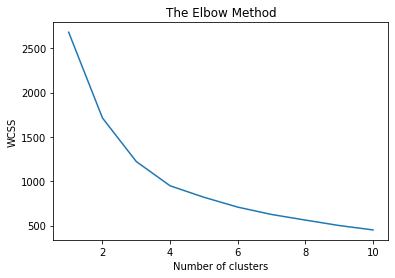

In [36]:
#还可以用肘方法评估聚类个数
wscc = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state=42)
    kmeans.fit(X)
    wscc.append(kmeans.inertia_)#每类数据到其中心聚类之和
plt.plot(range(1,11),wscc)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 聚类结果的特征分析

In [38]:
#将原始数据和聚类标签聚合
cluster_label = pd.DataFrame(cluster_label_k,columns=['clusters'])#获得训练集下的标签信息
merge_data = pd.concat([data,cluster_label],axis=1)#将原始处理过的数据和聚类标签整合

In [42]:
#计算每个聚类类别下的样本量和样本占比
clustering_count = pd.DataFrame(merge_data['渠道代号'].groupby(merge_data['clusters']).count()).T.rename({'渠道代号':'counts'})#计算每个聚类类别的样本量

clustering_ratio = (clustering_count/len(merge_data)).round(2).rename({'counts':'percentage'})#计算每个聚类类别的样本量占比

In [43]:
clustering_count

clusters,0,1,2,3
counts,154,349,313,73


In [44]:
clustering_ratio

clusters,0,1,2,3
percentage,0.17,0.39,0.35,0.08


In [45]:
merge_data.head()

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点,clusters
0,A203,3.69,0.0071,0.0214,2.3071,0.0258,20,jpg,banner,roi,140*40,打折,0
1,A387,178.70,0.0040,0.0324,2.0489,0.0030,19,jpg,banner,cpc,140*40,满减,0
2,A388,91.77,0.0022,0.0530,1.8771,0.0026,4,jpg,banner,cpc,140*40,满减,0
3,A389,1.09,0.0074,0.3382,4.2426,0.0153,10,jpg,banner,cpc,140*40,满减,0
4,A390,3.37,0.0028,0.1740,2.1934,0.0007,30,jpg,banner,cpc,140*40,满减,0


In [46]:
merge_data.iloc[:,7:-1].describe(include='all')

,素材类型,广告类型,合作方式,广告尺寸,广告卖点
count,889,889,889,889,889
unique,4,5,4,8,6
top,jpg,横幅,cpc,600*90,直降
freq,536,348,552,645,345


In [56]:
#计算各个聚类类别内部最显著特征值
cluster_features = []#空列表，用来存储最终合并后的所有特征信息
for line in range(4):#读取每个类的索引
    label_data = merge_data[merge_data['clusters']==line]#获得特定类的数据
    part1_data = label_data.iloc[:,1:7]#获得数据值型数据特征
    part1_desc = part1_data.describe().round(3)#得到数值型特征的描述性统计信息
    merge_data1 = part1_desc.iloc[2,:]#得到数值型特征的均值
    part2_data = label_data.iloc[:,7:-1]#获得字符串型数据特征
    part2_desc = part2_data.describe(include='all')#获得字符串数据特征的描述性统计信息
    merge_data2 = part2_desc.iloc[2,:]#获得字符串型数据特征的最频繁值
    merge_line = pd.concat((merge_data1,merge_data2),axis=0)#合并数值型和字符串型特征
    cluster_features.append(merge_line)#将每个类别下的数据特征追加到列表
    cluster_pd = pd.DataFrame(cluster_features).T#将列表转换为矩阵
    all_cluster_set = pd.concat((clustering_count,clustering_ratio,cluster_pd),axis=0)#将每个聚类类别的所有信息合并
print(all_cluster_set)

                  0        1        2        3
counts          154      349      313       73
percentage     0.17     0.39     0.35     0.08
日均UV        2717.42  933.015  1390.01  1904.37
平均注册率         0.005    0.003    0.003    0.003
平均搜索量         0.051    0.064    0.152    0.106
访问深度          0.947    5.916    1.168    0.943
订单转化率         0.007    0.006    0.017    0.009
投放总时间         8.529     8.77    8.199    8.217
素材类型            jpg      jpg      swf      swf
广告类型         banner       横幅      不确定     tips
合作方式            cpc      cpc      roi      cpm
广告尺寸        308*388   600*90   600*90  450*300
广告卖点             满减       直降       打折       打折


In [59]:
num_sets = cluster_pd.iloc[:6,:].T.astype(np.float64)#获取要展示的数据
num_sets_max_min = model_scaler.fit_transform(num_sets)#获得标准化后的数据

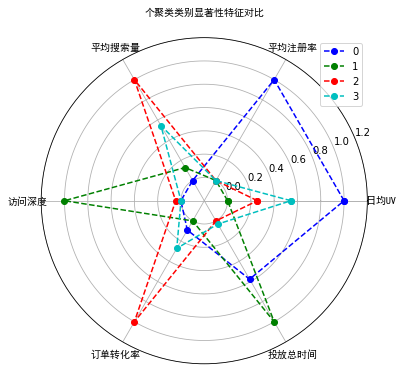

In [64]:
#画图
fig = plt.figure(figsize=(6,6))#建立画布
ax = fig.add_subplot(111,polar=True)#增加子网格，polar参数显示极坐标系
labels = np.array(merge_data1.index)#设置要展示的数据标签
cor_list = ['b','g','r','c','m','y','k','w']#定义不同类别的颜色
angles = np.linspace(0,2*np.pi,len(labels),endpoint=False)#计算各个区间的角度
angles = np.concatenate((angles,[angles[0]]))#建立相同首尾字段，以便于闭合

for i in range(len(num_sets)):#循环每个类别
    data_tmp = num_sets_max_min[i,:]#获得对应类数据
    data = np.concatenate((data_tmp,[data_tmp[0]]))
    ax.plot(angles,data,'o--',c=cor_list[i],label=i)#画线
    ax.set_thetagrids(angles*180/np.pi,labels,fontproperties='SimHei')#设置极坐标轴
    ax.set_title('个聚类类别显著性特征对比',fontproperties='SimHei')
    ax.set_rlim(-0.2,1.2)#设置坐标轴尺度范围
    plt.legend(loc=0)